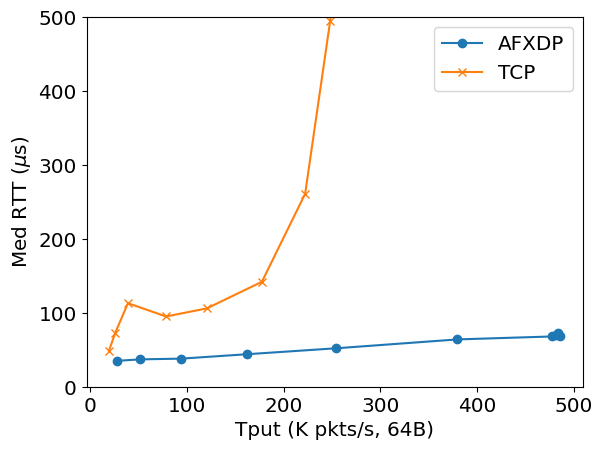

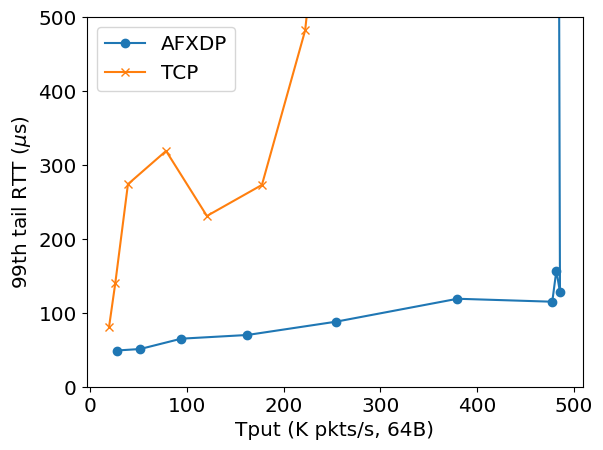

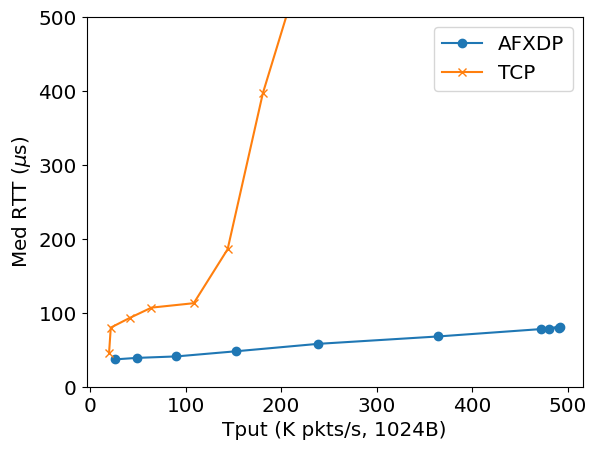

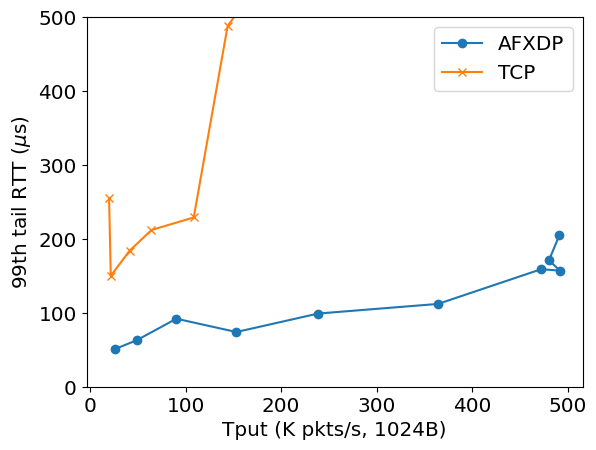

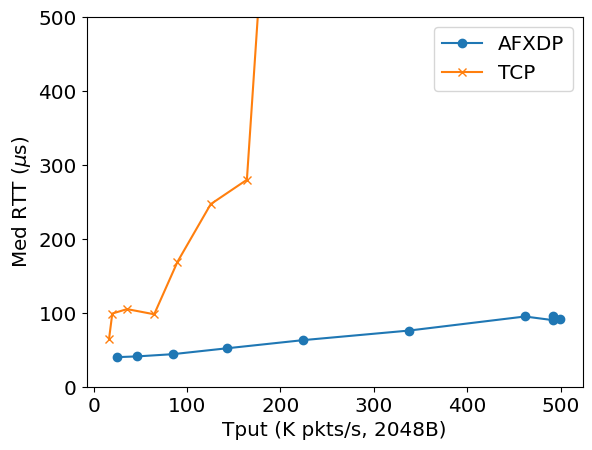

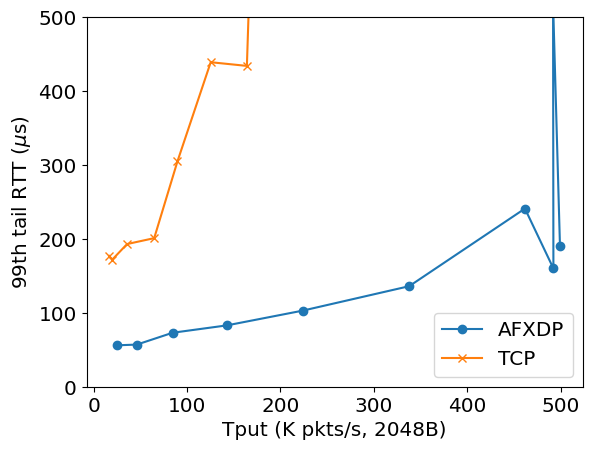

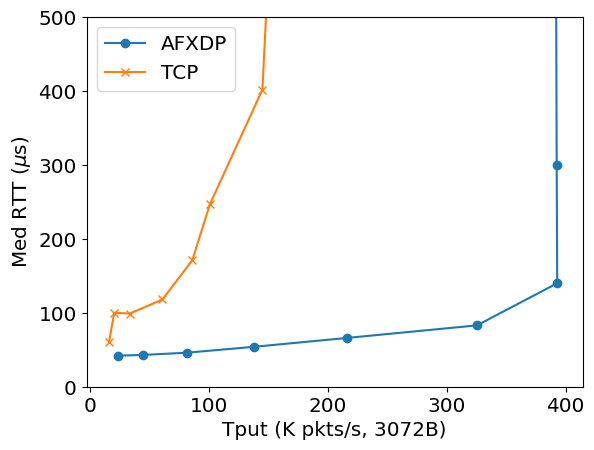

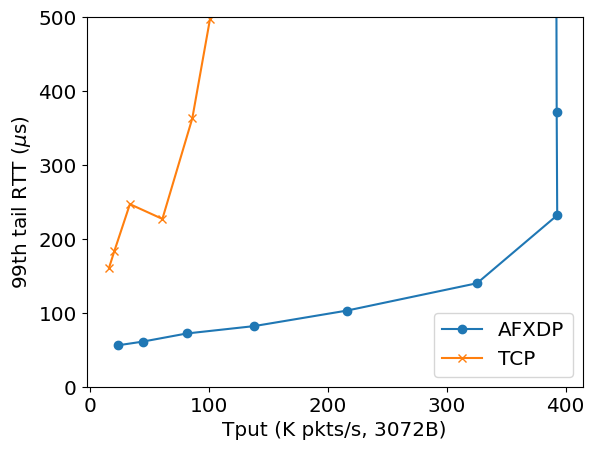

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("exp_res.csv")

# print(df.columns)
df = df[(df["legend"] == "afxdp") | (df["legend"] == "tcp")]
df["inflight_pkt"] = df["inflight_pkt"].astype(int)
df["payload_size"] = df["payload_size"].astype(int)
df["tput_kpkts"] = df["tput_kpkts"].astype(float)
df["bw_gbps"] = df["bw_gbps"].astype(float)
df["med_rtt_us"] = df["med_rtt_us"].astype(float)
df["tail_rtt_us"] = df["tail_rtt_us"].astype(float)
# print(df)

for payload_size in [64, 1024, 2048, 3072]:
    for yaxis in ["med_rtt_us", "tail_rtt_us"]:
        df_l = df[df["payload_size"] == payload_size]

        df1 = df_l[df_l["legend"] == "afxdp"]
        df1 = df1.sort_values(by=["inflight_pkt"], ascending=True)
        df2 = df_l[df_l["legend"] == "tcp"]
        df2 = df2.sort_values(by=["inflight_pkt"], ascending=True)

        # Plot median RTT vs tput
        f, ax = plt.subplots(ncols=1)
        (p1,) = ax.plot(
            df1["tput_kpkts"], df1[yaxis], label="AFXDP", marker="o"
        )
        (p2,) = ax.plot(df2["tput_kpkts"], df2[yaxis], label="TCP", marker="x")

        ax.set_xlabel(f"Tput (K pkts/s, {payload_size}B)", fontsize="x-large")
        ax.set_ylabel(
            (
                "Med RTT ($\mu$s)"
                if yaxis == "med_rtt_us"
                else "99th tail RTT ($\mu$s)"
            ),
            fontsize="x-large",
        )
        ax.xaxis.set_tick_params(labelsize="x-large")
        ax.yaxis.set_tick_params(labelsize="x-large")

        ax.set_ylim(ymin=0, ymax=500)

        ax.legend([p1, p2], ["AFXDP", "TCP"], fontsize="x-large")